# Week 3 - Collecting X (Formerly Twitter) Data for Predictive Tasks 

## 1. Twitter Data Collection 
### X (formerly Twitter) APIs
The Twitter API enables programmatic access to Twitter in unique and advanced ways. It used to be free, but now charges a fee of $100 per month. We have a class API that we collectively use. It is based on Twitter API V2. Please only use it for class projects and assignments.

[Twitter API Document](https://developer.twitter.com/en/docs/twitter-api)
### Workflow
Today, we will follow the workflow below to collect data and derive insights about tweet generation.

- Step 1: use username to retrieve user ID.
- Step 2: use user ID to retrieve Tweets.
- Step 3: generate topics from these tweets.
- Step 4: run a predictive model to predict outcomes (likes/views).
- Step 5: show the feature importance.

#### 1.1. Retrieve User ID from Username
The corresponding document is [here](https://developer.twitter.com/en/docs/twitter-api/users/lookup/api-reference/get-users-by-username-username).

In [2]:
import requests
import os
import json
import pandas as pd

# To set your enviornment variables in your terminal run the following line:
# export 'BEARER_TOKEN'='<your_bearer_token>'
bearer_token ='Ask Jane For It'


def create_url():
    # Specify the usernames that you want to lookup below
    # You can enter up to 100 comma-separated values.
    usernames = "usernames=Grammarly,copy_ai"
    user_fields = "user.fields=description,created_at,verified,public_metrics,id"
    # User fields are adjustable, options include:
    # created_at, description, entities, id, location, name,
    # pinned_tweet_id, profile_image_url, protected,
    # public_metrics, url, username, verified, and withheld
    url = "https://api.twitter.com/2/users/by?{}&{}".format(usernames, user_fields)
    #Uses curly braces {} as placeholders for the values provided through format().
    return url


def bearer_oauth(r):
    """
    Method required by bearer token authentication.
    """

    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2UserLookupPython"
    return r


def connect_to_endpoint(url):
    response = requests.request("GET", url, auth=bearer_oauth,)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(
            "Request returned an error: {} {}".format(
                response.status_code, response.text
            )
        )
    return response.json()


def main():
    url = create_url()
    json_response = connect_to_endpoint(url)
    data = json_response['data']
    # Normalize the data and create a dataframe
    df = pd.json_normalize(data)
    print(df)
    #print(json.dumps(json_response, indent=4, sort_keys=True))


if __name__ == "__main__":
    main()

200
        name                   id                created_at  verified  \
0  Grammarly             47191725  2009-06-14T22:23:52.000Z      True   
1    copy.ai  1300861660744372230  2020-09-01T18:22:46.000Z     False   

                                         description   username  \
0  Good writing moves work forward. #StandWithUkr...  Grammarly   
1  Over 10 million people use our ai copywriting ...    copy_ai   

   public_metrics.followers_count  public_metrics.following_count  \
0                          235022                            3637   
1                           56101                             253   

   public_metrics.tweet_count  public_metrics.listed_count  \
0                       41052                         3007   
1                         506                          595   

   public_metrics.like_count  
0                      21794  
1                       1081  


### 1.2 Collect Tweets with the User IDs 

The API documents for this step is [here](https://developer.twitter.com/en/docs/twitter-api/tweets/lookup/api-reference/get-tweets-id).

In [20]:
import requests
import os
import json
import pandas as pd

######################
####Authentication####
######################
bearer_token ='AAAAAAAAAAAAAAAAAAAAAA7fGwEAAAAATek8qNEHmKiwy5NeLLGGLu%2FOllc%3DvMI6a81TOlLcj6fthUgm5xT66tHGcKYcklMRLcRZjxQBKpqWJp'

def create_url():
    # Replace with user ID below
    user_id = 47191725
    return "https://api.twitter.com/2/users/{}/tweets".format(user_id)


def get_params():
    # Tweet fields are adjustable.
    # Options include:
    # attachments, author_id, context_annotations,
    # conversation_id, created_at, entities, geo, id,
    # in_reply_to_user_id, lang, non_public_metrics, organic_metrics,
    # possibly_sensitive, promoted_metrics, public_metrics, referenced_tweets,
    # source, text, and withheld
    return {"tweet.fields": "created_at,public_metrics"}


def bearer_oauth(r):
    """
    Method required by bearer token authentication.
    """
    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2UserTweetsPython"
    return r


def connect_to_endpoint(url, params):
    response = requests.request("GET", url, auth=bearer_oauth, params=params)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(
            "Request returned an error: {} {}".format(
                response.status_code, response.text
            )
        )
    return response.json()


def main():
    url = create_url()
    params = get_params()
    json_response = connect_to_endpoint(url, params)
    # Extract "data" key from JSON
    data = json_response['data']
    # Normalize the data and create a dataframe
    df = pd.json_normalize(data)
    print(df)
    # Save the DataFrame to a CSV file
    filename = 'tweets.csv'  # Specify the path and filename
    df.to_csv(filename, index=False)  # index=False means do not write row indices
    #print(json.dumps(json_response, indent=4, sort_keys=True))


if __name__ == "__main__":
    main()

200
                                                 text                   id  \
0   @rachaeldurant We're so glad you appreciate th...  1762201963997823061   
1   Faster workflows and smoother communication? N...  1762193341251522797   
2   @MCavacini That's what we love to hear! Thanks...  1762046543652118795   
3   @JElleman12 @uofnorthgeorgia We welcome educat...  1761057713344110598   
4   When the goal is to save time, a confusing mes...  1760787068936974448   
..                                                ...                  ...   
95  @sandyhubbard That's a lot of words! 🤩 We're h...  1747430685604790711   
96  @_dhruv_1 We can help with that: 👉 https://t.c...  1747429725046239669   
97  @kimdoyal Here to stroke your ego even further...  1747428851003576612   
98  @JamieLSaunders We hope you enjoy and keep war...  1747423696002642228   
99  Writing well starts with knowing how you sound...  1747295233614692365   

   edit_history_tweet_ids                created_at  \
0   

## 2.Topic Modeling

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import numpy as np

# Sample documents (same as above)
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
file_path = 'tweets.csv'
df = pd.read_csv(file_path)
docs = df['text']

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(docs)

# Apply NMF
nmf_model = NMF(n_components=20, random_state=42)
nmf_model.fit(tfidf)
W = nmf_model.fit_transform(tfidf)  # Document-topic matrix

# Display topics
feature_names = tfidf_vectorizer.get_feature_names_out()
topic_names=[]
for topic_idx, topic in enumerate(nmf_model.components_):
    print(f"Topic #{topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-4 - 1:-1]]))
    topic_names.append(" ".join([feature_names[i] for i in topic.argsort()[:-4 - 1:-1]]))

Topic #0:
thanks feature fan writing
Topic #1:
https teams help know
Topic #2:
work awesome faster just
Topic #3:
love hear doxdox say
Topic #4:
like feedback said hear
Topic #5:
writing sound journey help
Topic #6:
communication business report 2024
Topic #7:
sharing know thanks helpful
Topic #8:
thank thrilled community kind
Topic #9:
way words lot flow
Topic #10:
happy hear enjoy _opelo
Topic #11:
students institutions ai success
Topic #12:
sandyhubbard sandy community lot
Topic #13:
great job work writing
Topic #14:
time calendly save grammarly
Topic #15:
job wow awesome know
Topic #16:
glad thebrewergame yay journey
Topic #17:
company people connection countless
Topic #18:
buddyxo eye ve year
Topic #19:
shout thanks hear thrilled


C:\Users\Xue Tan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\Xue Tan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


## 3.Predictive Analytics

### 3.1 Outcome

In [4]:
import numpy as np
df['log_view']=np.log1p(df['public_metrics.impression_count'])  
# Create a new column 'LogPlusOne' which is the log(value + 1) of the 'Value' column

### 3.2 Data Partition

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Assuming `y` is your target variable array
X_train, X_test, y_train, y_test = train_test_split(W, df['public_metrics.like_count'], test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(W, df['log_view'], test_size=0.2, random_state=42)


### 3.3 Train Model

In [6]:
# Initialize the RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### 3.4 Prediction

In [7]:
# Make predictions and evaluate the model
predictions = regressor.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 43.15422769476564
Root Mean Squared Error: 6.569187750001185


In [8]:
# Baseline - Linear Regression
import statsmodels.api as sm

linear_regression = sm.OLS(y_train, X_train)
linear_regression = linear_regression.fit()
predictions = linear_regression.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 158.1722303771392
Root Mean Squared Error: 12.576654180549738


### 3.5 Feature Importance

shout thanks hear thrilled             0.000028
happy hear enjoy _opelo                0.000114
buddyxo eye ve year                    0.002481
glad thebrewergame yay journey         0.002513
great job work writing                 0.003289
sandyhubbard sandy community lot       0.003986
thanks feature fan writing             0.006925
job wow awesome know                   0.007070
love hear doxdox say                   0.016281
like feedback said hear                0.016698
sharing know thanks helpful            0.019109
way words lot flow                     0.029435
students institutions ai success       0.039127
thank thrilled community kind          0.076784
writing sound journey help             0.082623
time calendly save grammarly           0.102680
communication business report 2024     0.105482
work awesome faster just               0.110978
company people connection countless    0.180307
https teams help know                  0.194090
dtype: float64

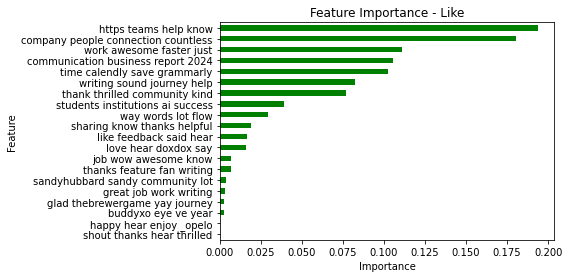

In [79]:
from matplotlib import pyplot as plt
#feature_names = [f"feature {i}" for i in range(W.shape[1])]
global_importances = pd.Series(regressor.feature_importances_, index=topic_names)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Like")
global_importances